In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import calendar

# Base Data

In [31]:
df = pd.read_csv("../data/terminwerte_TU_00183_akt/produkt_tu_termin_20240413_20251014_00183.txt", delimiter=";")
df.head()

,STATIONS_ID,MESS_DATUM,QN_4,TT_TER,RF_TER,eor
0,183,2024041306,9,9.9,90.0,eor
1,183,2024041312,9,14.0,82.0,eor
2,183,2024041318,9,12.1,85.0,eor
3,183,2024041406,9,9.0,78.0,eor
4,183,2024041412,9,10.6,69.0,eor


In [32]:
df.rename(columns={'QN_4': 'quality_niveau'}, inplace=True)
df.rename(columns={'TT_TER': 'temp_c'}, inplace=True)
df.rename(columns={'RF_TER': 'rel_humidity_perc'}, inplace=True)
df.drop(columns=['eor'])
df.head()

,STATIONS_ID,MESS_DATUM,quality_niveau,temp_c,rel_humidity_perc,eor
0,183,2024041306,9,9.9,90.0,eor
1,183,2024041312,9,14.0,82.0,eor
2,183,2024041318,9,12.1,85.0,eor
3,183,2024041406,9,9.0,78.0,eor
4,183,2024041412,9,10.6,69.0,eor


# Data Spreading

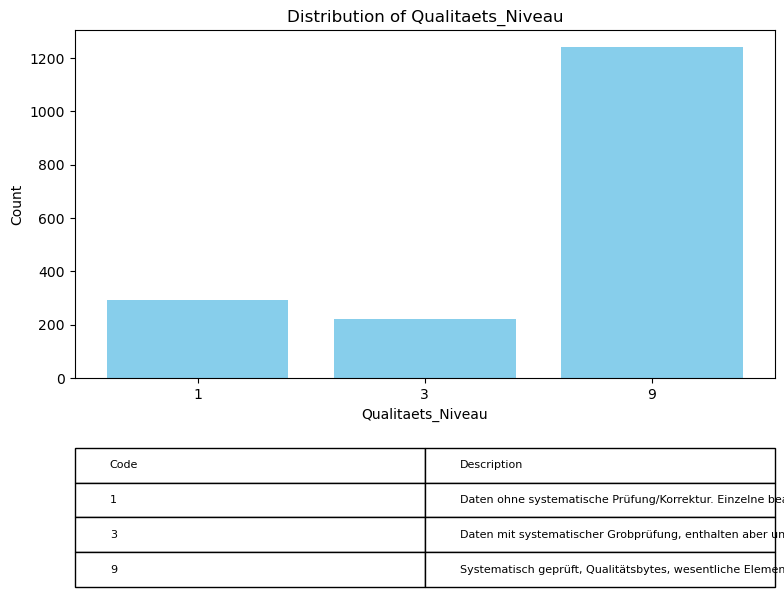

In [33]:
legend_labels = {
    0: "Testdaten, keine Routineprodukte oder -daten",
    1: "Daten ohne systematische Prüfung/Korrektur. Einzelne beanstandete/korrigierte Werte, keine Qualitätsbytes.",
    2: "Daten nach individuellen Kriterien geprüft/korrigiert. Keine systematische Qualitätsbytes.",
    3: "Daten mit systematischer Grobprüfung, enthalten aber ungeprüfte Werte ohne Qualitätsbytes.",
    4: "noch nicht vergeben",
    5: "Historische subjektive Qualitätssicherung, keine IT-gestützte Prüfung.",
    6: "noch nicht vergeben",
    7: "Daten systematisch geprüft, alle Werte mit Qualitätsbytes, beanstandete Werte gekennzeichnet, meist noch nicht korrigiert.",
    8: "Systematisch geprüft, Qualitätsbytes, beanstandete Werte gekennzeichnet, teilweise korrigiert.",
    9: "Systematisch geprüft, Qualitätsbytes, wesentliche Elemente systematisch korrigiert, einzelne ohne systematische Korrektur.",
    10: "Systematisch geprüft, ggf. korrigiert oder bestätigt, entspricht gültigen Verfahren.",
    16: "Homogenisierte Monatswerte."
}

# Get unique values and counts
values, counts = np.unique(df["quality_niveau"], return_counts=True)

# Prepare table data with keys and descriptions for only present keys
table_data = [[str(key), legend_labels[key]] for key in sorted(values)]

fig, ax = plt.subplots(figsize=(10, 6))

# Bar plot
ax.bar(values.astype(str), counts, color='skyblue')
ax.set_xlabel('Qualitaets_Niveau')
ax.set_ylabel('Count')
ax.set_title('Distribution of Qualitaets_Niveau')

# Add table below plot
table = plt.table(cellText=table_data,
                  colLabels=["Code", "Description"],
                  cellLoc='left',
                  colLoc='left',
                  loc='bottom',
                  bbox=[0, -0.6, 1, 0.4])  # [left, bottom, width, height]

table.auto_set_font_size(False)
table.set_fontsize(8)

plt.subplots_adjust(left=0.2, bottom=0.3)  # Make room for the table

plt.show()

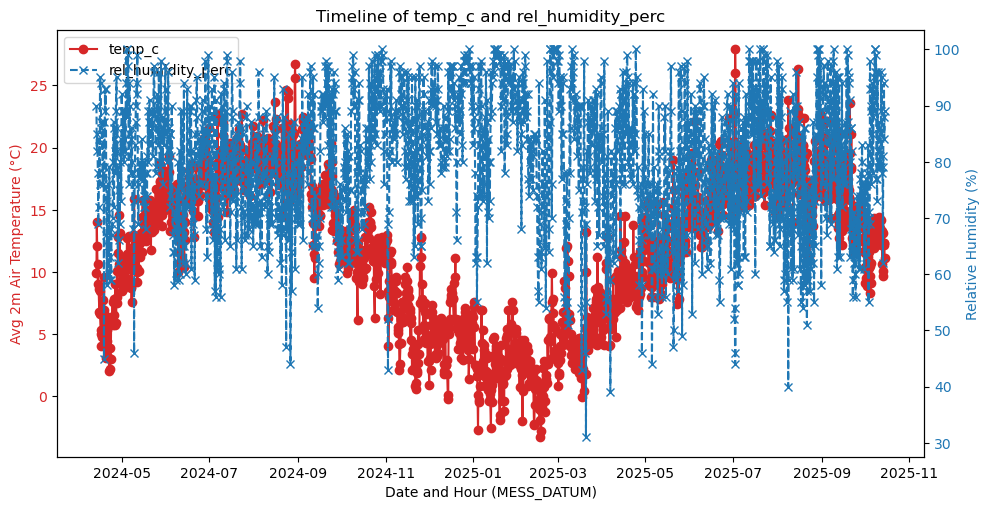

In [34]:
# Get Dataset copy
df_graph = df.copy()

# Convert MESS_DATUM (int or str) to datetime
df_graph['MESS_DATUM'] = pd.to_datetime(df_graph['MESS_DATUM'].astype(str), format='%Y%m%d%H')

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 5))

color_temp = 'tab:red'
ax1.set_xlabel('Date and Hour (MESS_DATUM)')
ax1.set_ylabel('Avg 2m Air Temperature (°C)', color=color_temp)
ax1.plot(df_graph['MESS_DATUM'], df_graph['temp_c'], color=color_temp, marker='o', label='temp_c')
ax1.tick_params(axis='y', labelcolor=color_temp)

ax2 = ax1.twinx()

color_rh = 'tab:blue'
ax2.set_ylabel('Relative Humidity (%)', color=color_rh)
ax2.plot(df_graph['MESS_DATUM'], df_graph['rel_humidity_perc'], color=color_rh, marker='x', linestyle='--', label='rel_humidity_perc')
ax2.tick_params(axis='y', labelcolor=color_rh)

fig.tight_layout()
plt.title('Timeline of temp_c and rel_humidity_perc')

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.show()

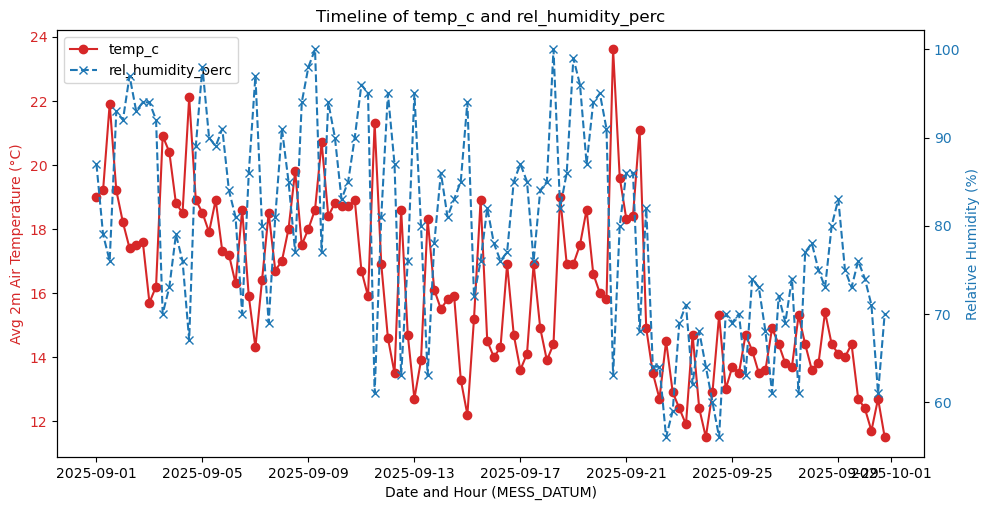

In [35]:
# Get Dataset copy
df_graph = df.copy()

# Transmute MESS_DATUM
## Convert MESS_DATUM column to datetime (if not done yet)
df_graph['MESS_DATUM'] = pd.to_datetime(df_graph['MESS_DATUM'].astype(str), format='%Y%m%d%H')

# Filter Dataset for the last month
# Example: specific month and year you want to filter
year = 2025
month = 9  # September

# Filter for the specific year and month
df_filtered = df_graph[(df_graph['MESS_DATUM'].dt.year == year) & (df_graph['MESS_DATUM'].dt.month == month)]

# Create Graph
## Plotting
fig, ax1 = plt.subplots(figsize=(10, 5))

color_temp = 'tab:red'
ax1.set_xlabel('Date and Hour (MESS_DATUM)')
ax1.set_ylabel('Avg 2m Air Temperature (°C)', color=color_temp)
ax1.plot(df_filtered['MESS_DATUM'], df_filtered['temp_c'], color=color_temp, marker='o', label='temp_c')
ax1.tick_params(axis='y', labelcolor=color_temp)

ax2 = ax1.twinx()

color_rh = 'tab:blue'
ax2.set_ylabel('Relative Humidity (%)', color=color_rh)
ax2.plot(df_filtered['MESS_DATUM'], df_filtered['rel_humidity_perc'], color=color_rh, marker='x', linestyle='--', label='rel_humidity_perc')
ax2.tick_params(axis='y', labelcolor=color_rh)

fig.tight_layout()
plt.title('Timeline of temp_c and rel_humidity_perc')

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.show()

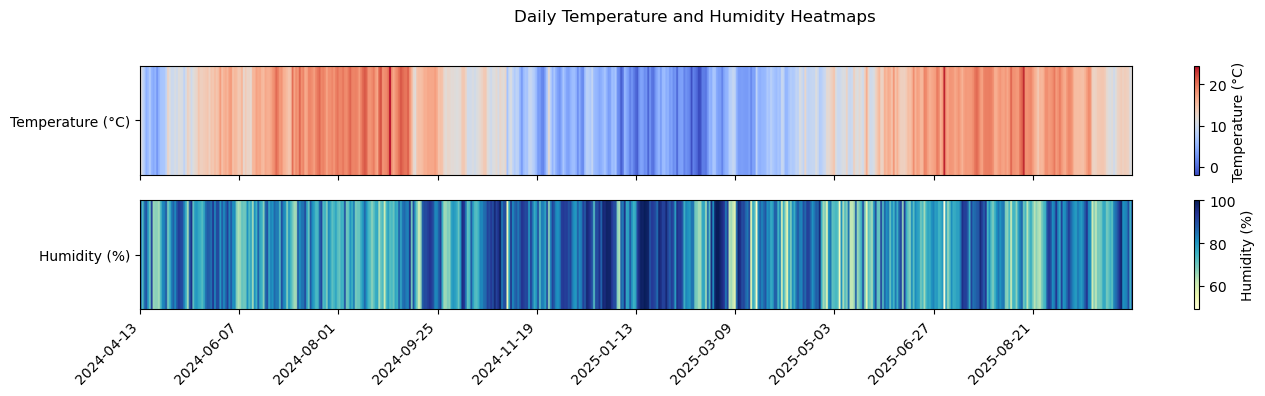

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Copy and preprocess the DataFrame
graph_df = df.copy()
graph_df['MESS_DATUM'] = pd.to_datetime(graph_df['MESS_DATUM'].astype(str), format='%Y%m%d%H')

# Aggregate to daily values
graph_df['date'] = graph_df['MESS_DATUM'].dt.floor('D')
daily_avg = graph_df.groupby('date')[['temp_c', 'rel_humidity_perc']].mean()

# Extract temperature and humidity as separate arrays
temp_array = daily_avg['temp_c'].values[np.newaxis, :]  # shape (1, N)
hum_array = daily_avg['rel_humidity_perc'].values[np.newaxis, :]  # shape (1, N)

dates = daily_avg.index

# Create figure and axes
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 4), sharex=True)

# Temperature heatmap
temp_im = ax1.imshow(temp_array, aspect='auto', cmap='coolwarm', extent=[0, len(dates), 0, 1])
ax1.set_yticks([0.5])
ax1.set_yticklabels(['Temperature (°C)'])
ax1.set_xticks([])  # hide x-axis ticks here

# Humidity heatmap
hum_im = ax2.imshow(hum_array, aspect='auto', cmap='YlGnBu', extent=[0, len(dates), 0, 1])
ax2.set_yticks([0.5])
ax2.set_yticklabels(['Humidity (%)'])

# Set x-axis ticks on bottom heatmap
step = max(len(dates) // 10, 1)
ax2.set_xticks(np.arange(0, len(dates), step))
ax2.set_xticklabels(dates.strftime('%Y-%m-%d')[::step], rotation=45, ha='right')

# Colorbars
cbar1 = fig.colorbar(temp_im, ax=ax1, orientation='vertical')
cbar1.set_label('Temperature (°C)')

cbar2 = fig.colorbar(hum_im, ax=ax2, orientation='vertical')
cbar2.set_label('Humidity (%)')

plt.suptitle('Daily Temperature and Humidity Heatmaps')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


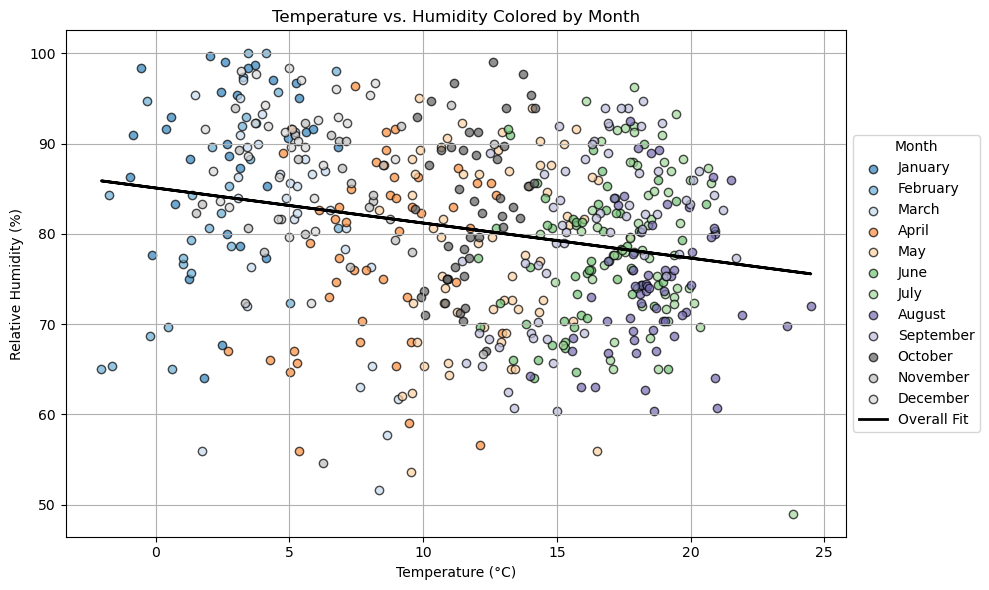

In [44]:
# Copy and preprocess the DataFrame
graph_df = df.copy()
graph_df['MESS_DATUM'] = pd.to_datetime(graph_df['MESS_DATUM'].astype(str), format='%Y%m%d%H')

# Extract month for coloring
graph_df['month'] = graph_df['MESS_DATUM'].dt.month

# Aggregate to daily averages
graph_df['date'] = graph_df['MESS_DATUM'].dt.floor('D')
daily_avg = graph_df.groupby(['date', 'month'])[['temp_c', 'rel_humidity_perc']].mean().dropna().reset_index()

# Set up color map for months
months = range(1, 13)
colors = plt.cm.tab20c(np.linspace(0, 1, 12))  # 12 distinct colors
month_color_map = {month: colors[i] for i, month in enumerate(months)}

# Plot scatter points colored by month
plt.figure(figsize=(10, 6))

for month in months:
    month_data = daily_avg[daily_avg['month'] == month]
    plt.scatter(
        month_data['temp_c'],
        month_data['rel_humidity_perc'],
        color=month_color_map[month],
        alpha=0.7,
        edgecolors='k',
        label=calendar.month_name[month]
    )

# Regression line (overall)
x = daily_avg['temp_c'].values
y = daily_avg['rel_humidity_perc'].values
slope, intercept = np.polyfit(x, y, 1)
regression_line = slope * x + intercept
plt.plot(x, regression_line, color='black', linewidth=2, label=f'Overall Fit')

# Labels and formatting
plt.xlabel('Temperature (°C)')
plt.ylabel('Relative Humidity (%)')
plt.title('Temperature vs. Humidity Colored by Month')
plt.grid(True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Month")
plt.tight_layout()
plt.show()


# Humidity

### Relation from Relative Humidity and Rain
Relative Humidity (RH) near the ground usually needs to be close to 100% (saturation) for rain to occur. 
That means the air is fully saturated with moisture.

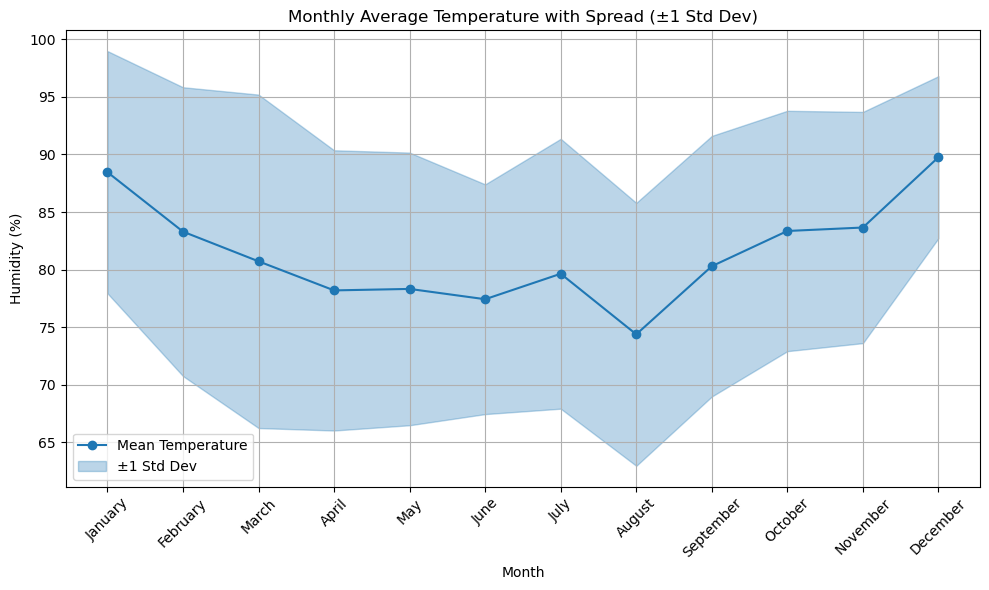

In [47]:
# Copy and preprocess the DataFrame
graph_df = df.copy()
graph_df['MESS_DATUM'] = pd.to_datetime(graph_df['MESS_DATUM'].astype(str), format='%Y%m%d%H')

# Extract month
graph_df['month'] = graph_df['MESS_DATUM'].dt.month

# Group by month and calculate mean and std dev of temperature
monthly_stats = graph_df.groupby('month')['rel_humidity_perc'].agg(['mean', 'std']).reset_index()

# Prepare data for plotting
months = monthly_stats['month']
mean_temp = monthly_stats['mean']
std_temp = monthly_stats['std']

# Plot average temperature per month with spread as shaded area
plt.figure(figsize=(10, 6))
plt.plot(months, mean_temp, marker='o', color='tab:blue', label='Mean Temperature')

# Shade ±1 std dev as spread
plt.fill_between(months, mean_temp - std_temp, mean_temp + std_temp, color='tab:blue', alpha=0.3, label='±1 Std Dev')

# Set x-ticks as month names
plt.xticks(months, [calendar.month_name[m] for m in months], rotation=45)

plt.xlabel('Month')
plt.ylabel('Humidity (%)')
plt.title('Monthly Average Temperature with Spread (±1 Std Dev)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Humidity stats during rain:
count    1756.000000
mean       80.339977
std        11.935774
min        31.000000
25%        72.000000
50%        81.000000
75%        90.000000
max       100.000000
Name: rel_humidity_perc, dtype: float64


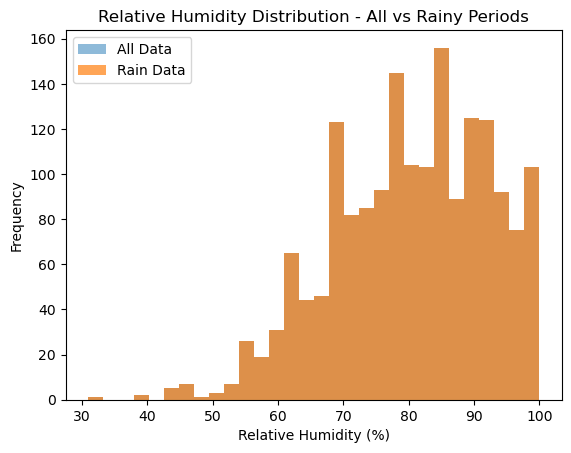

In [37]:
# Filter rows where precipitation > 0 (rain happened)
rain_df = df.copy()

# Check humidity statistics when it rains
print("Humidity stats during rain:")
print(rain_df['rel_humidity_perc'].describe())

# Optionally plot humidity distribution on rainy vs non-rainy days
import matplotlib.pyplot as plt

plt.hist(df['rel_humidity_perc'], bins=30, alpha=0.5, label='All Data')
plt.hist(rain_df['rel_humidity_perc'], bins=30, alpha=0.7, label='Rain Data')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Frequency')
plt.legend()
plt.title('Relative Humidity Distribution - All vs Rainy Periods')
plt.show()

In [38]:
rain_df = df.copy()

# Make sure MESS_DATUM is datetime (if not already)
rain_df['MESS_DATUM'] = pd.to_datetime(rain_df['MESS_DATUM'].astype(str), format='%Y%m%d%H')

# Filter rows where relative humidity is 100%
rh_100 = rain_df[rain_df['rel_humidity_perc'] == 100]

# Extract unique days (date without time)
days_with_100_rh = rh_100['MESS_DATUM'].dt.date.unique()

print("Days where Relative Humidity is 100%:")
for day in days_with_100_rh:
    print(day)
    

Days where Relative Humidity is 100%:
2024-05-04
2024-10-29
2024-12-29
2025-01-15
2025-01-17
2025-01-29
2025-02-23
2025-02-25
2025-02-26
2025-02-27
2025-02-28
2025-03-10
2025-04-24
2025-07-12
2025-07-20
2025-07-22
2025-08-28
2025-08-29
2025-08-30
2025-09-09
2025-09-18
2025-10-07
2025-10-08


C:\Users\User\AppData\Local\Temp\ipykernel_40096\1518479245.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rh_100['date'] = rh_100['MESS_DATUM'].dt.date
C:\Users\User\AppData\Local\Temp\ipykernel_40096\1518479245.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rh_100['year_month'] = rh_100['MESS_DATUM'].dt.to_period('M').astype(str)


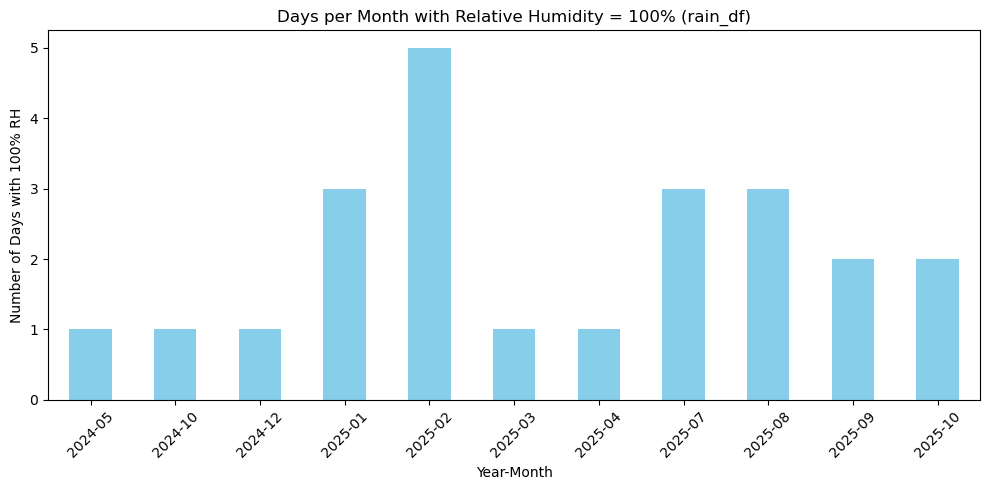

In [39]:
# Filter rows where relative humidity is 100%
rh_100 = rain_df[rain_df['rel_humidity_perc'] == 100]

# Extract the date (day without time)
rh_100['date'] = rh_100['MESS_DATUM'].dt.date

# Extract year-month string for grouping (e.g. '2025-10')
rh_100['year_month'] = rh_100['MESS_DATUM'].dt.to_period('M').astype(str)

# Count unique days per month where RH=100%
days_per_month = rh_100.groupby('year_month')['date'].nunique()

# Plot
plt.figure(figsize=(10, 5))
days_per_month.plot(kind='bar', color='skyblue')
plt.xlabel('Year-Month')
plt.ylabel('Number of Days with 100% RH')
plt.title('Days per Month with Relative Humidity = 100% (rain_df)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Temperature

count    1756.000000
mean       12.309282
std         6.059956
min        -3.300000
25%         7.400000
50%        13.400000
75%        17.400000
max        27.900000
Name: temp_c, dtype: float64


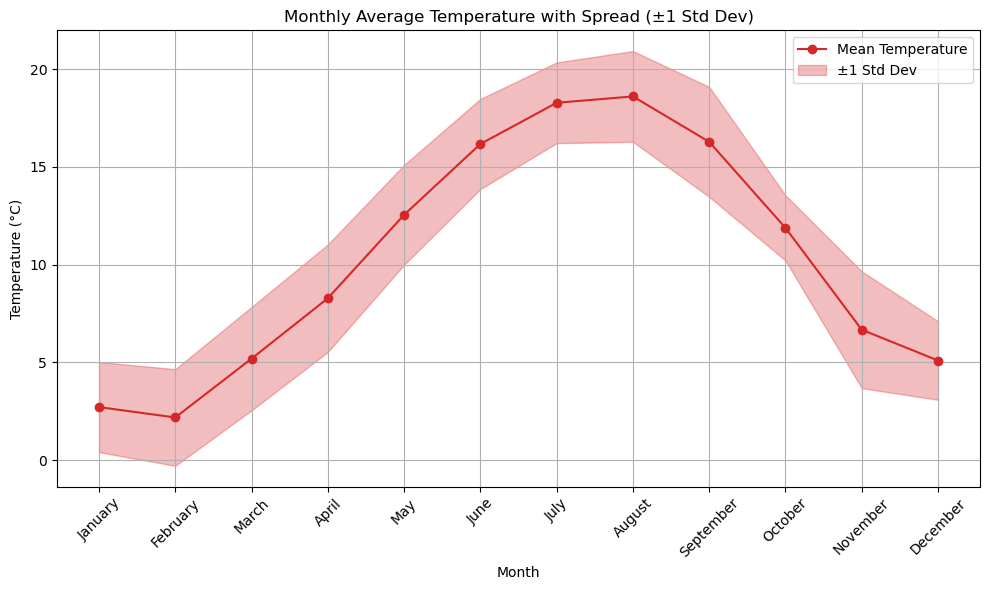

In [49]:
# Copy and preprocess the DataFrame
graph_df = df.copy()
graph_df['MESS_DATUM'] = pd.to_datetime(graph_df['MESS_DATUM'].astype(str), format='%Y%m%d%H')

print(rain_df['temp_c'].describe())

# Extract month
graph_df['month'] = graph_df['MESS_DATUM'].dt.month

# Group by month and calculate mean and std dev of temperature
monthly_stats = graph_df.groupby('month')['temp_c'].agg(['mean', 'std']).reset_index()

# Prepare data for plotting
months = monthly_stats['month']
mean_temp = monthly_stats['mean']
std_temp = monthly_stats['std']

# Plot average temperature per month with spread as shaded area
plt.figure(figsize=(10, 6))
plt.plot(months, mean_temp, marker='o', color='tab:red', label='Mean Temperature')

# Shade ±1 std dev as spread
plt.fill_between(months, mean_temp - std_temp, mean_temp + std_temp, color='tab:red', alpha=0.3, label='±1 Std Dev')

# Set x-ticks as month names
plt.xticks(months, [calendar.month_name[m] for m in months], rotation=45)

plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.title('Monthly Average Temperature with Spread (±1 Std Dev)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Outliers in Data

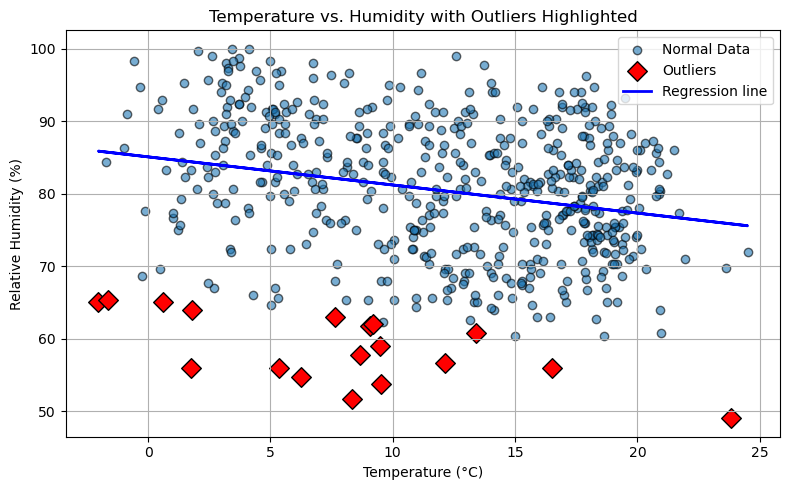

Outlier data points:
               temp_c  rel_humidity_perc
date                                    
2024-11-02   6.266667          54.666667
2025-01-03   1.800000          64.000000
2025-02-16  -2.033333          65.000000
2025-02-17  -1.633333          65.333333
2025-02-20   0.600000          65.000000
2025-03-05   7.633333          63.000000
2025-03-07   9.066667          61.666667
2025-03-08   8.666667          57.666667
2025-03-17   1.733333          56.000000
2025-03-20   8.333333          51.666667
2025-04-03   9.466667          59.000000
2025-04-06   5.366667          56.000000
2025-04-28  12.133333          56.666667
2025-05-05   9.533333          53.666667
2025-05-11   9.200000          62.000000
2025-05-20  16.500000          56.000000
2025-07-02  23.825000          49.000000
2025-09-22  13.400000          60.750000


In [48]:
# Prepare data as before
graph_df = df.copy()
graph_df['MESS_DATUM'] = pd.to_datetime(graph_df['MESS_DATUM'].astype(str), format='%Y%m%d%H')
graph_df['date'] = graph_df['MESS_DATUM'].dt.floor('D')
daily_avg = graph_df.groupby('date')[['temp_c', 'rel_humidity_perc']].mean().dropna()

x = daily_avg['temp_c'].values
y = daily_avg['rel_humidity_perc'].values

# Fit linear regression line
slope, intercept = np.polyfit(x, y, 1)
predicted = slope * x + intercept

# Calculate residuals
residuals = y - predicted
std_resid = np.std(residuals)

# Define threshold for outliers (e.g., 2 std dev)
threshold = 2 * std_resid
outliers_mask = np.abs(residuals) > threshold

# Plot all points
plt.figure(figsize=(8,5))
plt.scatter(x, y, alpha=0.6, edgecolors='k', label='Normal Data')

# Highlight outliers
plt.scatter(x[outliers_mask], y[outliers_mask], color='red', edgecolors='k', label='Outliers', s=100, marker='D')

# Plot regression line
plt.plot(x, predicted, color='blue', linewidth=2, label=f'Regression line')

plt.xlabel('Temperature (°C)')
plt.ylabel('Relative Humidity (%)')
plt.title('Temperature vs. Humidity with Outliers Highlighted')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Optional: print outliers data points
outliers_df = daily_avg[outliers_mask]
print("Outlier data points:")
print(outliers_df)
